<a href="https://colab.research.google.com/github/allanbraquiel/Data_Science_Projects/blob/master/Desafio_Banco_Carrefour_Digital_Inovation_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio Banco Carrefour - Digital Inovation One

Este desafio consiste em 4 etapas:

- Usar a API do Twitter pata consumir as Top Trendings e seu devido volume
- Armazenar o histórico das trendings em um banco de dados NoSql
- Utilizar um biblioteca gráfica para exibir os dados
- Utilizar IA para análise se de sentimentosdos tweetse referents aos top trendings


## Usar a API do Twitter pata consumir as Top Trendings armazenar no MongoDB

A biblioteca utilizada para extração dos tweets será o Tweepy

In [ ]:
#! pip install tweepy

Importando as bibliotecas necessárias

In [1]:
import sys
import json
import pandas as pd
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from datetime import datetime

Chaves de acesso adquiridas no Twitter Developer

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [3]:
# Criando as chaves de autenticação

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [4]:
# Criando uma classe para capturar os dados do twitter e armazenar no MongoDB

class MyListener(StreamListener):
  def on_data(self, dados):
    tweet = json.loads(dados)
    created_at = tweet["created_at"]
    id_str = tweet["id_str"]
    text = tweet["text"]
    obj = {"created_at":created_at,"id_str":id_str,"text":text,}
    tweetind = col.insert_one(obj).inserted_id
    print(obj)
    return True

In [5]:
# Criando os objetos mylistener e mystream

mylistener = MyListener()
mystream = Stream(auth, listener = mylistener)

Agora precisamos configurar a conexão com o MongoDB no Atlas

In [6]:
# Preparando a conexão com o MongoClient
#! pip install pymongo

In [7]:
from pymongo import MongoClient

In [8]:
# Bibliotecas essenciais para estabelecer uma conexão com Atlas
#!pip install dnspython
#!pip install pymongo[srv]
#!python -m pip install pymongo[srv]

In [11]:
# Criando a conexão com o Mongoclient
conn_str = "mongodb+srv://<usuario>:<senha>@cluster0.sjh5m.mongodb.net/test?retryWrites=true&w=majority"

# set a 5-second connection timeout
client = MongoClient(conn_str, serverSelectionTimeoutMS=5000)

In [12]:
# Criando o banco de dados twitterdb e a conllection col
db = client.twitterdb
col = db.tweets

In [13]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [14]:
# Verificando as top trendings somente no Brazil neste exato momento
BRAZIL_WOE_ID = 23424768
 
brazil_trends = api.trends_place(BRAZIL_WOE_ID)
 
trends = json.loads(json.dumps(brazil_trends, indent=1))

In [15]:
lista_trends = []

for trend in trends[0]["trends"]:
    lista_trends.append(trend["name"])

In [16]:
# Como a lista é muito grande, iremos reduzir a somente as 10 primeiras
lista_tt =lista_trends[:10]
lista_tt

['Norris',
 'Vitinho',
 'Hamilton',
 '#f1naband',
 'Verstappen',
 '#RussianGP',
 '#colunadofla',
 '#AMExFLA',
 'Bottas',
 'Ademir']

In [17]:
# Inserindo a lista de top trendings em uma lista de palavras chave
keywords = []

for i in lista_tt:
    keywords.append(i)

type(keywords)

list

In [21]:
# Agora que já temos os items a ser pesquisados, iremos coletar os tweets e armazenar no MongoDB
mystream.filter(track=keywords)

{'created_at': 'Sun Sep 26 15:02:44 +0000 2021', 'id_str': '1442142599825936391', 'text': '@T1Earn @F1 @LandoNorris If that was the case then Bottas would have been ahead of Lewis several times....', '_id': ObjectId('61508b99cba05a4a0cfabc33')}
{'created_at': 'Sun Sep 26 15:02:44 +0000 2021', 'id_str': '1442142600107077632', 'text': 'RT @F1: A momentous day for Lewis Hamilton \nA remarkable fightback drive from Max Verstappen\n\n#RussianGP #F1 https://t.co/sPoC9VEzXe', '_id': ObjectId('61508b99cba05a4a0cfabc34')}
{'created_at': 'Sun Sep 26 15:02:44 +0000 2021', 'id_str': '1442142600383766532', 'text': 'Gang', '_id': ObjectId('61508b99cba05a4a0cfabc35')}
{'created_at': 'Sun Sep 26 15:02:44 +0000 2021', 'id_str': '1442142600627044357', 'text': 'RT @katyfairman: As Lance Stroll once said, ‘sometimes you love the sport, it just don’t love you back’. \n\n🇷🇺 #RussianGP #F1', '_id': ObjectId('61508b99cba05a4a0cfabc36')}
{'created_at': 'Sun Sep 26 15:02:44 +0000 2021', 'id_str': '1442142600509

KeyboardInterrupt: ignored

Devido ao limite de inserções no Atlas, a execução da célula acima foi interrrompida

In [22]:
# Fechando a conexão com o Twitter
mystream.disconnect()

In [23]:
# Verificando a quantidade de documentos que foram armazenads no MongoDB
db.tweets.estimated_document_count()

2000

In [24]:
# Criando um dataset com as informações da data de criação e o texto do tweet
dataset = [{"created_at": item["created_at"], "text": item["text"],} for item in col.find()]

In [25]:
# Convertendo o dataset em um Dataframe Pandas
df =  pd.DataFrame(dataset)

In [26]:
df.head()

,created_at,text
0,Sun Sep 26 15:02:44 +0000 2021,@T1Earn @F1 @LandoNorris If that was the case ...
1,Sun Sep 26 15:02:44 +0000 2021,RT @F1: A momentous day for Lewis Hamilton \nA...
2,Sun Sep 26 15:02:44 +0000 2021,Gang
3,Sun Sep 26 15:02:44 +0000 2021,"RT @katyfairman: As Lance Stroll once said, ‘s..."
4,Sun Sep 26 15:02:44 +0000 2021,RT @ESPNF1: Lewis Hamilton's 1st and 100th win...


In [27]:
#! pip install scikit-learn

In [28]:
# Importando o SKlearn usando o CountVectorizer para criar uma matriz de documentos
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(df.text)

In [29]:
# Contando o número de ocorrências das principais palavras no dataset, ainda sem nenhum tratamento retirando as stopwords
word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
0,rt,1290
1,https,875
2,co,851
3,f1,725
4,the,520
5,russiangp,502
6,hamilton,442
7,to,438
8,de,383
9,lewis,373


In [30]:
# Verificando as 10 primeiras linhas da coluna de texto do dataset
df.text.head(10)

0    @T1Earn @F1 @LandoNorris If that was the case ...
1    RT @F1: A momentous day for Lewis Hamilton \nA...
2                                                 Gang
3    RT @katyfairman: As Lance Stroll once said, ‘s...
4    RT @ESPNF1: Lewis Hamilton's 1st and 100th win...
5    RT @sebvettelnews: Seb: "I think it was an ent...
6    RT @crosaleny: Qué barbaridad de carrera. Ya e...
7    RT @centraldanacao: Vitinho é o jogador mais e...
8    RT @Yagura02409376: Andreas, Kenedy e Ramon no...
9    Tira Renê, Diego e Vitinho. Só colocar Ramon, ...
Name: text, dtype: object

In [31]:
df.text.tail(10)

1990    @madididew Nya pressure juak, first win nya bh...
1991    Yuki really changed into softs and went 2 laps...
1992    RT @F1: 🏁 LAP 53/53 END OF RACE 🏁 \n\nTOP 10 \...
1993    RT @F1: HISTORY!!! 💯\n\n@LewisHamilton becomes...
1994    @benjamineverest What do we think of Norris mi...
1995    RT @F1: Class from Lando  \n\n#RussianGP #F1 h...
1996    RT @ESPNF1: Lewis Hamilton is the first driver...
1997                                             HECKYESS
1998    RT @ESPNF1: Lewis Hamilton's 1st and 100th win...
1999    RT @BrunoPaqueta39: @Flamengo Vitinho no prime...
Name: text, dtype: object

In [32]:
# Convertendo esta coluna do Dataframe em uma lista
list_tweets = list(df.text)
type(list_tweets)

list

In [33]:
# Aqui podemos ver a lista de tweets coletados
list_tweets

['@T1Earn @F1 @LandoNorris If that was the case then Bottas would have been ahead of Lewis several times....',
 'RT @F1: A momentous day for Lewis Hamilton \nA remarkable fightback drive from Max Verstappen\n\n#RussianGP #F1 https://t.co/sPoC9VEzXe',
 'Gang',
 'RT @katyfairman: As Lance Stroll once said, ‘sometimes you love the sport, it just don’t love you back’. \n\n🇷🇺 #RussianGP #F1',
 "RT @ESPNF1: Lewis Hamilton's 1st and 100th wins 🥺 https://t.co/mE20CbNP3g",
 'RT @sebvettelnews: Seb: "I think it was an entertaining race for the fans and I am happy for Lewis to have won his 100th Grand Prix: a huge…',
 'RT @crosaleny: Qué barbaridad de carrera. Ya era muy buena antes de la lluvia, pero luego… lo siento por @LandoNorris, pero muy bien jugado…',
 'RT @centraldanacao: Vitinho é o jogador mais estranho que passou pelo Flamengo.',
 'RT @Yagura02409376: Andreas, Kenedy e Ramon no segundo tempo.\n\n#colunadofla',
 'Tira Renê, Diego e Vitinho. Só colocar Ramon, Andreas e Michael',
 'RT @F

## Utilizar um biblioteca gráfica para exibir os dados

Agora vamos criar uma nuvem de palavras com os termos mais presentes

In [34]:
#!pip install wordcloud

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sklearn

In [38]:
# Acrescentando novas palavras as stopwords
stopwords = set(STOPWORDS)
stopwords.update(["o", "do", "da", "de", "ao", "os", "as", "https", "dos", "se", "em", "na", "é", 
                  "e", "t", "com", "que", "por", "só", "são", "eu", "vc", "co", "rt"])

In [39]:
vectorizer = CountVectorizer(stop_words=stopwords, min_df=1)
type(vectorizer)

sklearn.feature_extraction.text.CountVectorizer

In [41]:
cv = CountVectorizer(list_tweets, stop_words=stopwords, min_df=1)
count_vector=cv.fit_transform(list_tweets)

TypeError: ignored

In [42]:
# Agora podemos ver uma contagem de palavras já com o tratamento das stopwords
cv.vocabulary_

{'t1earn': 4677,
 'f1': 1811,
 'landonorris': 2805,
 'if': 2468,
 'that': 4779,
 'was': 5236,
 'the': 4780,
 'case': 893,
 'then': 4788,
 'bottas': 728,
 'would': 5308,
 'have': 2321,
 'been': 631,
 'ahead': 288,
 'of': 3460,
 'lewis': 2875,
 'several': 4440,
 'times': 4827,
 'rt': 4264,
 'momentous': 3231,
 'day': 1277,
 'for': 2031,
 'hamilton': 2305,
 'remarkable': 4142,
 'fightback': 1952,
 'drive': 1502,
 'from': 2078,
 'max': 3091,
 'verstappen': 5105,
 'russiangp': 4285,
 'https': 2429,
 'co': 1024,
 'spoc9vezxe': 4567,
 'gang': 2134,
 'katyfairman': 2716,
 'as': 486,
 'lance': 2802,
 'stroll': 4612,
 'once': 3493,
 'said': 4314,
 'sometimes': 4530,
 'you': 5383,
 'love': 2963,
 'sport': 4569,
 'it': 2592,
 'just': 2694,
 'don': 1473,
 'back': 583,
 'espnf1': 1716,
 '1st': 48,
 'and': 388,
 '100th': 18,
 'wins': 5284,
 'me20cbnp3g': 3110,
 'sebvettelnews': 4378,
 'seb': 4374,
 'think': 4799,
 'an': 382,
 'entertaining': 1650,
 'race': 4049,
 'fans': 1873,
 'am': 361,
 'happy': 2

In [43]:
# Para criar a nuvem de palavras vamos unir a lista de tweets em uma única string
all_tweets = " ".join(s for s in list_tweets)

In [44]:
all_tweets

'@T1Earn @F1 @LandoNorris If that was the case then Bottas would have been ahead of Lewis several times.... RT @F1: A momentous day for Lewis Hamilton \nA remarkable fightback drive from Max Verstappen\n\n#RussianGP #F1 https://t.co/sPoC9VEzXe Gang RT @katyfairman: As Lance Stroll once said, ‘sometimes you love the sport, it just don’t love you back’. \n\n🇷🇺 #RussianGP #F1 RT @ESPNF1: Lewis Hamilton\'s 1st and 100th wins 🥺 https://t.co/mE20CbNP3g RT @sebvettelnews: Seb: "I think it was an entertaining race for the fans and I am happy for Lewis to have won his 100th Grand Prix: a huge… RT @crosaleny: Qué barbaridad de carrera. Ya era muy buena antes de la lluvia, pero luego… lo siento por @LandoNorris, pero muy bien jugado… RT @centraldanacao: Vitinho é o jogador mais estranho que passou pelo Flamengo. RT @Yagura02409376: Andreas, Kenedy e Ramon no segundo tempo.\n\n#colunadofla Tira Renê, Diego e Vitinho. Só colocar Ramon, Andreas e Michael RT @F1: HISTORY!!! 💯\n\n@LewisHamilton become

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
# A máscara é uma imagem que usaremos como plano de fundo para a nuvem de palavras, neste caso usaremos como fundo a bandeita do Brasil
mask = np.array(Image.open("/content/drive/MyDrive/Colab_Notebooks/Twitter/bandeira-do-brasil.png"))

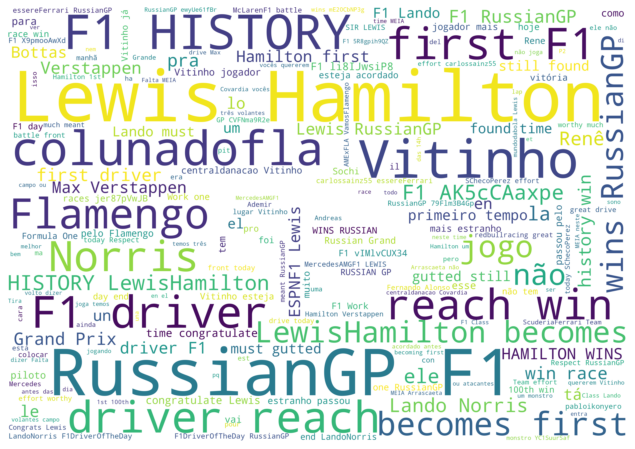

In [46]:
# Agora vamos gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white",
                     width=1600, height=1200,
                     mask=mask).generate(all_tweets)

fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Análise de Sentimentos

In [47]:
# Utilizaremos o nlpretext para criar pipeline de tratamento dos dados
#!pip install nlpretext

In [80]:
# Pipeline default
from nlpretext import Preprocessor

In [81]:
# Pipeline Customizada
from nlpretext.basic.preprocess import (normalize_whitespace, remove_punct, remove_eol_characters, remove_stopwords, lower_text)
from nlpretext.social.preprocess import remove_mentions, remove_hashtag, remove_emoji

preprocessor = Preprocessor()

In [82]:
# Para ficar mais claro cada passo, vamos visualizar cadas passo para verificarmos o resultado a cada pipeline

# Deixando todo o texto em minúsculo
new_list_tweets = []

preprocessor.pipe(lower_text)
for tweet in list_tweets:
  new_list_tweets.append(preprocessor.run(tweet))

print(new_list_tweets)

['@t1earn @f1 @landonorris if that was the case then bottas would have been ahead of lewis several times....', 'rt @f1: a momentous day for lewis hamilton \na remarkable fightback drive from max verstappen\n\n#russiangp #f1 https://t.co/spoc9vezxe', 'gang', 'rt @katyfairman: as lance stroll once said, ‘sometimes you love the sport, it just don’t love you back’. \n\n🇷🇺 #russiangp #f1', "rt @espnf1: lewis hamilton's 1st and 100th wins 🥺 https://t.co/me20cbnp3g", 'rt @sebvettelnews: seb: "i think it was an entertaining race for the fans and i am happy for lewis to have won his 100th grand prix: a huge…', 'rt @crosaleny: qué barbaridad de carrera. ya era muy buena antes de la lluvia, pero luego… lo siento por @landonorris, pero muy bien jugado…', 'rt @centraldanacao: vitinho é o jogador mais estranho que passou pelo flamengo.', 'rt @yagura02409376: andreas, kenedy e ramon no segundo tempo.\n\n#colunadofla', 'tira renê, diego e vitinho. só colocar ramon, andreas e michael', 'rt @f1: history

In [83]:
# Removendo menções
new_list_tweets_mentions = []

preprocessor.pipe(remove_mentions)
for tweet in new_list_tweets:
  new_list_tweets_mentions.append(preprocessor.run(tweet))

print(new_list_tweets_mentions)

['if that was the case then bottas would have been ahead of lewis several times....', 'rt : a momentous day for lewis hamilton a remarkable fightback drive from max verstappen\n#russiangp #f1 https://t.co/spoc9vezxe', 'gang', 'rt : as lance stroll once said, ‘sometimes you love the sport, it just don’t love you back’. 🇷🇺 #russiangp #f1', "rt : lewis hamilton's 1st and 100th wins 🥺 https://t.co/me20cbnp3g", 'rt : seb: "i think it was an entertaining race for the fans and i am happy for lewis to have won his 100th grand prix: a huge…', 'rt : qué barbaridad de carrera. ya era muy buena antes de la lluvia, pero luego… lo siento por , pero muy bien jugado…', 'rt : vitinho é o jogador mais estranho que passou pelo flamengo.', 'rt : andreas, kenedy e ramon no segundo tempo.\n#colunadofla', 'tira renê, diego e vitinho. só colocar ramon, andreas e michael', 'rt : history!!! 💯\n becomes the first f1 driver ever to reach 100 wins 👏👏👏\n#russiangp #f1 https://t.co/ak5ccaaxpe', 'rt : norris não foi 

In [84]:
# Removendo hashtags
new_list_tweets_hashtags = []

preprocessor.pipe(remove_hashtag)
for tweet in new_list_tweets_mentions:
  new_list_tweets_hashtags.append(preprocessor.run(tweet))

print(new_list_tweets_hashtags)

['if that was the case then bottas would have been ahead of lewis several times....', 'rt : a momentous day for lewis hamilton a remarkable fightback drive from max verstappen\n https://t.co/spoc9vezxe', 'gang', 'rt : as lance stroll once said, ‘sometimes you love the sport, it just don’t love you back’. 🇷🇺', "rt : lewis hamilton's 1st and 100th wins 🥺 https://t.co/me20cbnp3g", 'rt : seb: "i think it was an entertaining race for the fans and i am happy for lewis to have won his 100th grand prix: a huge…', 'rt : qué barbaridad de carrera. ya era muy buena antes de la lluvia, pero luego… lo siento por , pero muy bien jugado…', 'rt : vitinho é o jogador mais estranho que passou pelo flamengo.', 'rt : andreas, kenedy e ramon no segundo tempo.', 'tira renê, diego e vitinho. só colocar ramon, andreas e michael', 'rt : history!!! 💯\n becomes the first f1 driver ever to reach 100 wins 👏👏👏\n https://t.co/ak5ccaaxpe', 'rt : norris não foi burro,ele só apostou como quem não tem vitórias e tava bu

In [85]:
# Removendo emojis
new_list_tweets_emojis = []

preprocessor.pipe(remove_emoji)
for tweet in new_list_tweets_hashtags:
  new_list_tweets_emojis.append(preprocessor.run(tweet))

print(new_list_tweets_emojis)

['if that was the case then bottas would have been ahead of lewis several times....', 'rt : a momentous day for lewis hamilton a remarkable fightback drive from max verstappen\n https://t.co/spoc9vezxe', 'gang', 'rt : as lance stroll once said, ‘sometimes you love the sport, it just don’t love you back’. ', "rt : lewis hamilton's 1st and 100th wins  https://t.co/me20cbnp3g", 'rt : seb: "i think it was an entertaining race for the fans and i am happy for lewis to have won his 100th grand prix: a huge…', 'rt : qué barbaridad de carrera. ya era muy buena antes de la lluvia, pero luego… lo siento por , pero muy bien jugado…', 'rt : vitinho é o jogador mais estranho que passou pelo flamengo.', 'rt : andreas, kenedy e ramon no segundo tempo.', 'tira renê, diego e vitinho. só colocar ramon, andreas e michael', 'rt : history!!! \n becomes the first f1 driver ever to reach 100 wins \n https://t.co/ak5ccaaxpe', 'rt : norris não foi burro,ele só apostou como quem não tem vitórias e tava buscando 

In [86]:
# Removendo stopwords em Português
new_list_tweets_stopwords = []

preprocessor.pipe(remove_stopwords, args={"lang": "pt"})
for tweet in new_list_tweets_emojis:
  new_list_tweets_stopwords.append(preprocessor.run(tweet))

print(new_list_tweets_stopwords)

['if that was the case then bottas would have been ahead of lewis several times....', 'rt : momentous day lewis hamilton remarkable fightback drive from max verstappen https://t.co/spoc9vezxe', 'gang', 'rt : lance stroll once said, ‘sometimes you love the sport, it just don’t love you back’.', "rt : lewis hamilton's 1st and 100th wins https://t.co/me20cbnp3g", 'rt : seb: "i think it was an entertaining race the fans and i am happy lewis to have won his 100th grand prix: huge…', 'rt : qué barbaridad carrera. ya muy buena la lluvia, pero luego… lo siento , pero muy bien jugado…', 'rt : vitinho jogador estranho passou flamengo.', 'rt : andreas, kenedy ramon tempo.', 'tira renê, diego vitinho. colocar ramon, andreas michael', 'rt : history!!! becomes the first f1 driver ever to reach 100 wins https://t.co/ak5ccaaxpe', 'rt : norris burro,ele apostou vitórias tava buscando categoria,é errado isso?,nen…', 'sarah connor mi heroína!!! ️', 'rt : 12:20bst: light showers have now closed to within 

In [87]:
# Removendo pontuação
new_list_tweets_pontos = []

preprocessor.pipe(remove_punct)
for tweet in new_list_tweets_stopwords:
  new_list_tweets_pontos.append(preprocessor.run(tweet))

print(new_list_tweets_pontos)

['if that was the case then bottas would have been ahead of lewis several times    ', 'rt   momentous day lewis hamilton remarkable fightback drive from max verstappen https   t co spoc9vezxe', 'gang', 'rt   lance stroll once said   sometimes you love the sport  it just don t love you back  ', 'rt   lewis hamilton s 1st and 100th wins https   t co me20cbnp3g', 'rt   seb   i think it was an entertaining race the fans and i am happy lewis to have won his 100th grand prix  huge ', 'rt   qué barbaridad carrera  ya muy buena la lluvia  pero luego  lo siento   pero muy bien jugado ', 'rt   vitinho jogador estranho passou flamengo ', 'rt   andreas  kenedy ramon tempo ', 'tira renê  diego vitinho  colocar ramon  andreas michael', 'rt   history    becomes the first f1 driver ever to reach 100 wins https   t co ak5ccaaxpe', 'rt   norris burro ele apostou vitórias tava buscando categoria é errado isso  nen ', 'sarah connor mi heroína    ️', 'rt   12 20bst  light showers have now closed to within 

In [88]:
# Removendo excesso de espaços em branco
new_list_tweets_espacos = []

preprocessor.pipe(normalize_whitespace)
for tweet in new_list_tweets_pontos:
  new_list_tweets_espacos.append(preprocessor.run(tweet))

print(new_list_tweets_espacos)

['if that was the case then bottas would have been ahead of lewis several times', 'rt momentous day lewis hamilton remarkable fightback drive from max verstappen https t co spoc9vezxe', 'gang', 'rt lance stroll once said sometimes you love the sport it just don t love you back', 'rt lewis hamilton s 1st and 100th wins https t co me20cbnp3g', 'rt seb i think it was an entertaining race the fans and i am happy lewis to have won his 100th grand prix huge', 'rt qué barbaridad carrera ya muy buena la lluvia pero luego lo siento pero muy bien jugado', 'rt vitinho jogador estranho passou flamengo', 'rt andreas kenedy ramon', 'tira renê diego vitinho colocar ramon andreas michael', 'rt history becomes the first f1 driver ever to reach 100 wins https t co ak5ccaaxpe', 'rt norris burro apostou vitórias tava buscando categoria errado nen', 'sarah connor mi heroína ️', 'rt 12 20bst light showers have now closed to within approximately 15km 9 miles from circuit latest', 'hamilton back in the lead a

In [90]:
# Por fim para a lista final de tweets iremos retirar a palavra rt de cada tweet
list_tweets_final = []

for i in new_list_tweets_espacos:
  list_tweets_final.append(str(i.replace("rt", "")))

list_tweets_final

['if that was the case then bottas would have been ahead of lewis several times',
 ' momentous day lewis hamilton remarkable fightback drive from max verstappen https t co spoc9vezxe',
 'gang',
 ' lance stroll once said sometimes you love the spo it just don t love you back',
 ' lewis hamilton s 1st and 100th wins https t co me20cbnp3g',
 ' seb i think it was an enteaining race the fans and i am happy lewis to have won his 100th grand prix huge',
 ' qué barbaridad carrera ya muy buena la lluvia pero luego lo siento pero muy bien jugado',
 ' vitinho jogador estranho passou flamengo',
 ' andreas kenedy ramon',
 'tira renê diego vitinho colocar ramon andreas michael',
 ' history becomes the first f1 driver ever to reach 100 wins https t co ak5ccaaxpe',
 ' norris burro apostou vitórias tava buscando categoria errado nen',
 'sarah connor mi heroína ️',
 ' 12 20bst light showers have now closed to within approximately 15km 9 miles from circuit latest',
 'hamilton back in the lead after 100th

Agora que os dados foram tratados, utilizaremos o Transformers para calssificar os tweets

In [92]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 12.6 MB/s 
     |████████████████████████████████| 3.3 MB 61.9 MB/s 
     |████████████████████████████████| 636 kB 23.9 MB/s 
     |████████████████████████████████| 52 kB 876 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [95]:
from transformers import pipeline
classificador = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [98]:
# Realizando a análise de sentimentos dos tweets após as transformações
analise = []

for i in list_tweets_final:
  analise.append(classificador(i))

In [99]:
# Resultado da análise
analise

[[{'label': 'POSITIVE', 'score': 0.9772027134895325}],
 [{'label': 'POSITIVE', 'score': 0.9995868802070618}],
 [{'label': 'NEGATIVE', 'score': 0.9948813915252686}],
 [{'label': 'NEGATIVE', 'score': 0.9823331236839294}],
 [{'label': 'POSITIVE', 'score': 0.9971132278442383}],
 [{'label': 'POSITIVE', 'score': 0.9997809529304504}],
 [{'label': 'NEGATIVE', 'score': 0.9578340649604797}],
 [{'label': 'POSITIVE', 'score': 0.7591320276260376}],
 [{'label': 'POSITIVE', 'score': 0.9868707656860352}],
 [{'label': 'POSITIVE', 'score': 0.9728297591209412}],
 [{'label': 'POSITIVE', 'score': 0.9841379523277283}],
 [{'label': 'NEGATIVE', 'score': 0.9626452326774597}],
 [{'label': 'NEGATIVE', 'score': 0.9788615703582764}],
 [{'label': 'NEGATIVE', 'score': 0.9797999262809753}],
 [{'label': 'POSITIVE', 'score': 0.9969621300697327}],
 [{'label': 'POSITIVE', 'score': 0.9936622381210327}],
 [{'label': 'POSITIVE', 'score': 0.9836822152137756}],
 [{'label': 'POSITIVE', 'score': 0.9841379523277283}],
 [{'label'

In [102]:
# Mesclando os tweets a análise de sentimento
resultado = list(zip(list_tweets_final, analise))

In [103]:
resultado

[('if that was the case then bottas would have been ahead of lewis several times',
  [{'label': 'POSITIVE', 'score': 0.9772027134895325}]),
 (' momentous day lewis hamilton remarkable fightback drive from max verstappen https t co spoc9vezxe',
  [{'label': 'POSITIVE', 'score': 0.9995868802070618}]),
 ('gang', [{'label': 'NEGATIVE', 'score': 0.9948813915252686}]),
 (' lance stroll once said sometimes you love the spo it just don t love you back',
  [{'label': 'NEGATIVE', 'score': 0.9823331236839294}]),
 (' lewis hamilton s 1st and 100th wins https t co me20cbnp3g',
  [{'label': 'POSITIVE', 'score': 0.9971132278442383}]),
 (' seb i think it was an enteaining race the fans and i am happy lewis to have won his 100th grand prix huge',
  [{'label': 'POSITIVE', 'score': 0.9997809529304504}]),
 (' qué barbaridad carrera ya muy buena la lluvia pero luego lo siento pero muy bien jugado',
  [{'label': 'NEGATIVE', 'score': 0.9578340649604797}]),
 (' vitinho jogador estranho passou flamengo',
  [{'

Agora temos os tweets com uma análise de sentimentos, sendo informado o score de cada previsão 